In [1]:
import numpy as np
import openslide
from PIL import Image
from openslide import OpenSlideError
import math
import os

OSError: libiconv.so.2: cannot open shared object file: No such file or directory

In [20]:
import numpy as np
from PIL import Image
import math
import os
black_imgfile = '/home/shared/data/center_0/patches_256/color/017_1_514_31074_62362.png'

In [21]:
def convert_to_npy(filename):
    img = Image.open(filename) 
    data = np.array(img, dtype = 'uint8')
    return data

def get_white_trans_fracs(patch):
    white = np.mean(patch, 2) > 200
    transparent = np.mean(patch, 2) == 0
    num_pixels = patch.shape[0] * patch.shape[1]
    frac_white = np.sum(white) / num_pixels
    frac_trans = np.sum(transparent) / num_pixels
    return frac_white, frac_trans

def get_black_fracs(patch_np):
    black = np.mean(patch_np, 2) < 64
    num_pixels = patch_np.shape[0] * patch_np.shape[1]
    frac_black = np.sum(black) / num_pixels
    return frac_black

In [22]:
black_np = convert_to_npy(black_imgfile)

In [23]:
get_black_fracs(black_np)

0.3593902587890625

In [ ]:
# black 0.775390625
# good 0.0
# black 0.359

In [ ]:
filename = 'data/patient_096_node_2.tif'
#dest_path = 'data/debug_patches/'

good_path = 'data/good_patches/'
bad_path = 'data/bad_patches/'

patch_h = 500
patch_w = 500

slide = openslide.open_slide(filename)

[w, h] = slide.dimensions
#x_TL = 0
#y_TL = 0 # top left corner

x_TL = math.floor(w / 2) # start around the center
y_TL = math.floor(h / 2)

idx = 0 # patch index (start from 0)

x_list = np.arange(start = x_TL, stop = w, step = patch_w) # drop the boarder patch
y_list = np.arange(start = y_TL, stop = h, step = patch_h)

for x in x_list:
    for y in y_list:
        patch = slide.read_region((x,y), 0, (patch_w,patch_h)) # extract patch. PIL Image object
        patch_np = np.array(patch, dtype = 'uint8')
        frac_white, frac_trans = get_white_trans_fracs(patch_np)
        
        if frac_white < 0.95 and frac_trans < 0.1:
            patch_name = good_path + str(idx) + '_' + str(x) + '_' + str(y) + '.png'
            patch.save(patch_name)
        else:
            patch_name = bad_path + str(idx) + '_' + str(x) + '_' + str(y) + '.png'
            patch.save(patch_name)
        idx += 1

In [3]:
slide

OpenSlide('data/patient_098_node_0.tif')

In [3]:
w

143872

In [4]:
h

96256

In [5]:
w /2

71936.0

In [6]:
h /2

48128.0

In [12]:
type(math.floor(w / 2))

int

In [13]:
x_TL = math.floor(w / 2) # start around the center
y_TL = math.floor(h / 2)

In [14]:
x_TL

71936

In [15]:
y_TL

48128

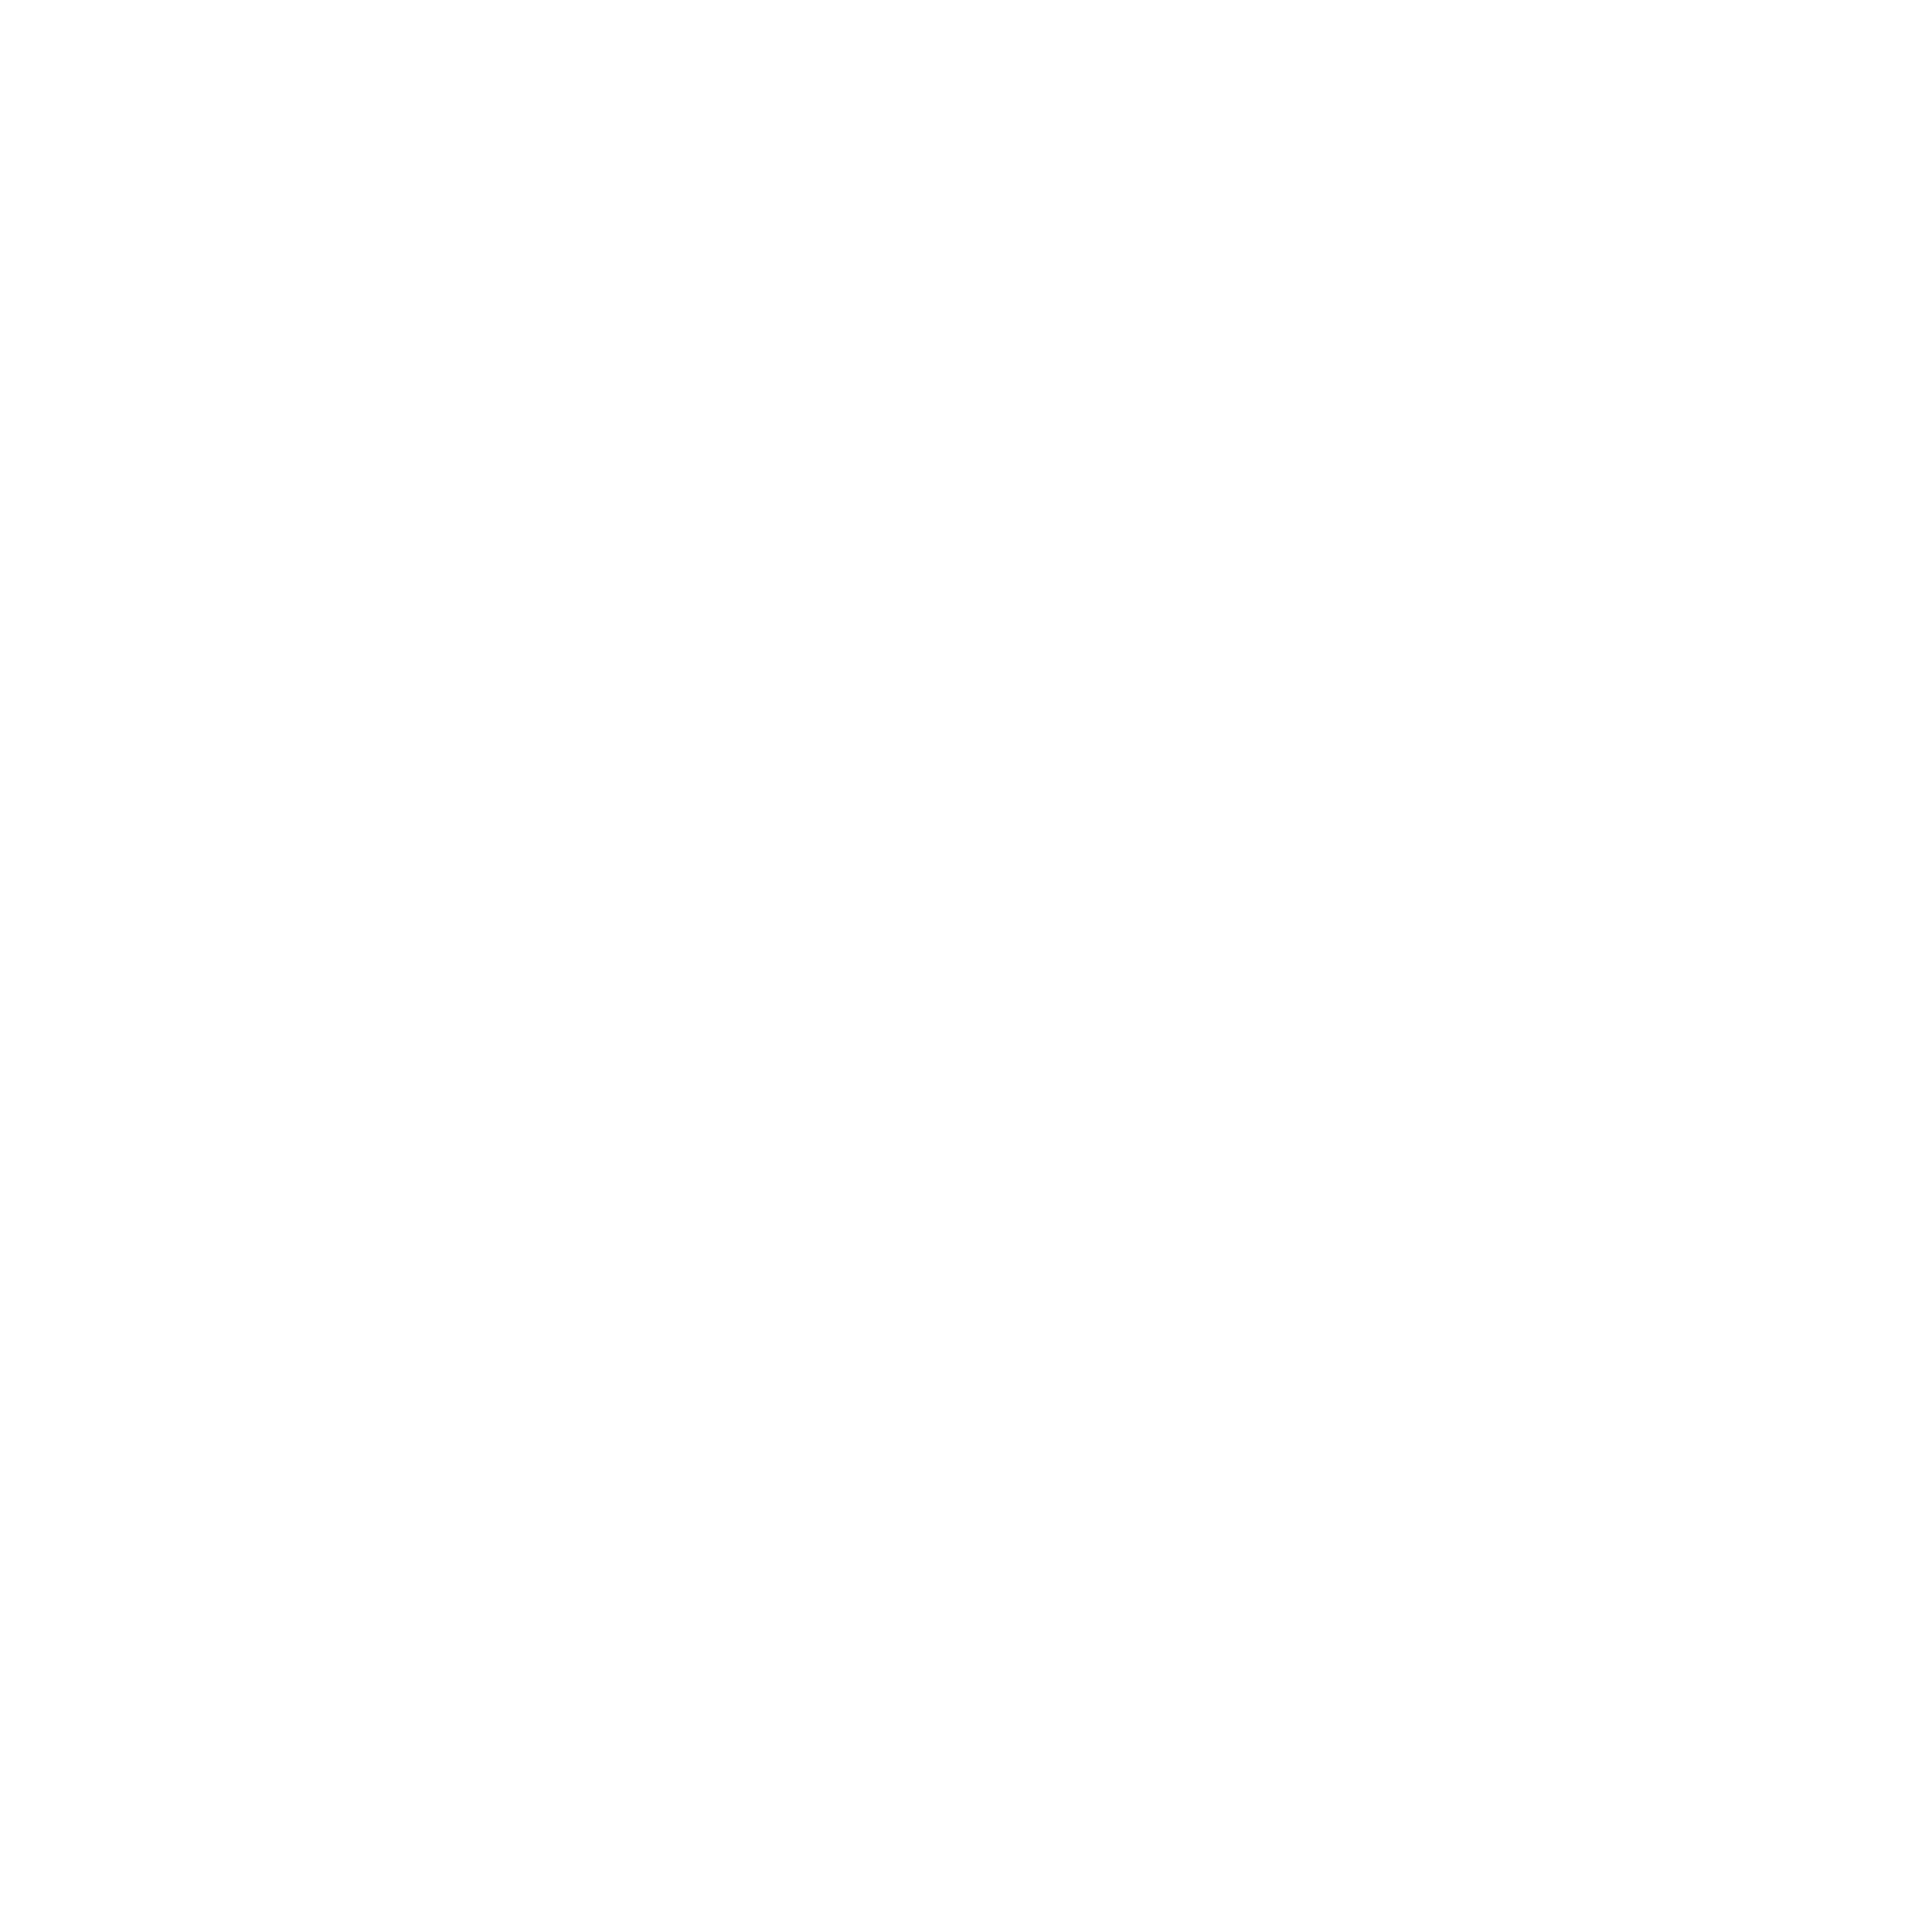

In [16]:
patch

In [17]:
data = np.array(patch, dtype = 'uint8')

In [18]:
data

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)